Collaborative Filtering method is usually based on collecting and analyzing information on user’s behaviors, their activities or preferences and predicting what they will like based on the similarity with other users. <br/>
A key advantage of the collaborative filtering approach is that it does not rely on machine analyzable content and thus it is capable of accurately recommending complex items such as movies without requiring an “understanding” of the item itself.Collaborative filtering is based on the assumption that people who agreed in the past will agree in the future, and that they will like similar kinds of items as they liked in the past. <br/>
https://www.business2community.com/business-intelligence/explained-working-and-advantages-of-a-recommendation-engine-02344556

# Book Recommendation: Item-Based Collaborative filtering

This algothrimn tries to find items that look alike. Once we have item look alike matrix, we can easily recommend alike items to a customer who has purchased any item from the store. This algorithm requires far fewer resources than user-user collaborative filtering. Hence, for a new customer, the algorithm takes far less time than user-user collaborative filtering as we don’t need all similarity scores between customers. Amazon uses this approach in its recommendation engine to show related products which boost sales.<br/>
https://www.business2community.com/business-intelligence/explained-working-and-advantages-of-a-recommendation-engine-02344556

In [1]:
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split

In [2]:
df_book = pd.read_csv("books.csv")
df_rating = pd.read_csv("ratings.csv")

In [3]:
print("shape of df_book",df_book.shape)
print("shape of df_rating", df_rating.shape)
print("columns of df_book" , df_book.columns)
print("columns of df_rating" , df_rating.columns)

shape of df_book (10000, 23)
shape of df_rating (981756, 3)
columns of df_book Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')
columns of df_rating Index(['book_id', 'user_id', 'rating'], dtype='object')


In [4]:
df_book = df_book[["book_id" , "title", "average_rating" , "ratings_count"]]
df_book.head()

,book_id,title,average_rating,ratings_count
0,2767052,"The Hunger Games (The Hunger Games, #1)",4.34,4780653
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479
2,41865,"Twilight (Twilight, #1)",3.57,3866839
3,2657,To Kill a Mockingbird,4.25,3198671
4,4671,The Great Gatsby,3.89,2683664


In [5]:
df = pd.merge(df_rating, df_book , on = "book_id", how  = "inner")
df.head()

,book_id,user_id,rating,title,average_rating,ratings_count
0,1,314,5,Harry Potter and the Half-Blood Prince (Harry ...,4.54,1678823
1,1,439,3,Harry Potter and the Half-Blood Prince (Harry ...,4.54,1678823
2,1,588,5,Harry Potter and the Half-Blood Prince (Harry ...,4.54,1678823
3,1,1169,4,Harry Potter and the Half-Blood Prince (Harry ...,4.54,1678823
4,1,1185,4,Harry Potter and the Half-Blood Prince (Harry ...,4.54,1678823


In [6]:
print("There are", df["user_id"].nunique(),"unique users.")
print("There are", df["book_id"].nunique(),"unique books.")

There are 28906 unique users.
There are 812 unique books.


<ipython-input-7-f45ca4fff14d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([num for num in ax.get_yticks()])


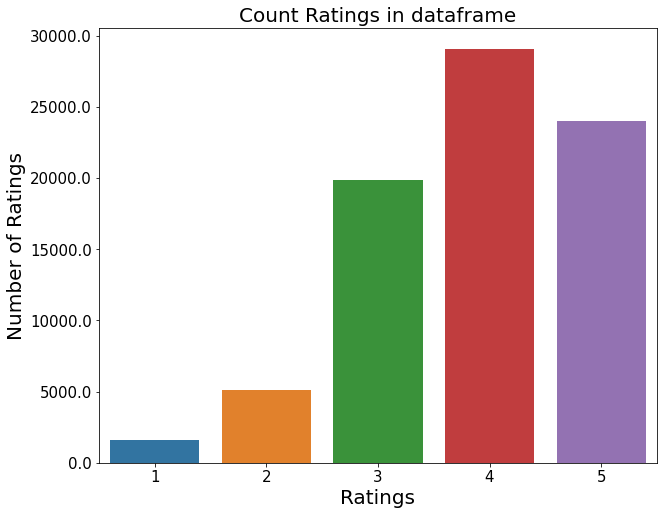

In [7]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(x="rating", data=df)
ax.set_yticklabels([num for num in ax.get_yticks()])
plt.tick_params(labelsize = 15)
plt.title("Count Ratings in dataframe", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [8]:
#Split dataset into train/test dataset to further evaluate the recommender system we built
X = df.copy()
y = df["user_id"]
#Split into training and test datasets, stratified along user_id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [9]:
print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: (59775, 6)
X_test.shape: (19926, 6)
y_train.shape: (59775,)
y_test.shape: (19926,)


In [10]:
#Pivot our data to create the user-item table (replace null values with 0)
df_crosstab = df.pivot_table(values='rating', index='user_id', columns='title', fill_value=0)
print("df_crosstab's shape:",df_crosstab.shape)
#Example: 
print("we find that there are", df_crosstab[df_crosstab['A Case of Need'] != 0].index.nunique(), "unique users who rated the book: A Case of Need")
df_crosstab[df_crosstab['A Case of Need'] != 0]


df_crosstab's shape: (28906, 812)
we find that there are 91 unique users who rated the book: A Case of Need


title,'Salem's Lot,"'Tis (Frank McCourt, #2)",1421: The Year China Discovered America,1776,1984,A Bend in the River,A Bend in the Road,A Brief History of Time,A Briefer History of Time,A Case of Need,...,"Women in Love (Brangwen Family, #2)",World War Z: An Oral History of the Zombie War,"World Without End (The Kingsbridge Series, #2)",Wuthering Heights,"Xenocide (Ender's Saga, #3)",Year of Wonders,You Shall Know Our Velocity!,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values,Zodiac,number9dream
user_id,,,,,,,,,,,,,,,,,,,,,
3230,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0.0,0
3773,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0.0,0
4922,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0.0,0
6477,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0.0,0
9301,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0.0,0
52813,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0.0,0
53258,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0.0,0


#### Sparsity of the Dataset

In [11]:
#Sparsity = Total number of available ratings/ Total number of possible ratings
available_rating = np.count_nonzero(df_crosstab)
print("available_rating",available_rating)
possible_rating = len(df_crosstab.index) * len(df_crosstab.columns)
print("possible_rating",possible_rating)
Sparsity = available_rating/possible_rating
print("The sparsity of this dataset is: " ,Sparsity )

available_rating 79531
possible_rating 23471672
The sparsity of this dataset is:  0.0033883823870749386


In [12]:
# Transpose the rating_crosstab matrix to perform item-based collaborative filtering.
df_T = df_crosstab.T

### SVD Transformation

In [13]:
#use SVD to reduce the dimentionality of data
SVD = TruncatedSVD(n_components=12, random_state=5)
SVD_matrix = SVD.fit_transform(df_T)
SVD_matrix.shape

(812, 12)

### Similarity: Pearson Correlation Coefficient

In [14]:
corr_matrix = np.corrcoef(SVD_matrix)
corr_matrix.shape

(812, 812)

### Recommendation : "To Kill a Mockingbird" (top 10)

In [15]:
col_index = df_crosstab.columns.get_loc("To Kill a Mockingbird")
corr_specific = corr_matrix[col_index]
pd.DataFrame({'corr_specific':corr_specific, 'Books': df_crosstab.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)

,corr_specific,Books
750,1.000000,To Kill a Mockingbird
522,0.953875,"The Body Farm (Kay Scarpetta, #5)"
511,0.951944,The BFG
696,0.949963,The Shipping News
670,0.940658,The Poetry of Pablo Neruda
363,0.923622,"Moonraker (James Bond, #3)"
290,0.909257,Islands in the Stream
347,0.871315,"Mayflower: A Story of Courage, Community, and War"
682,0.856199,The Red Tent
479,0.836314,"Speaker for the Dead (Ender's Saga, #2)"


Note:<br/>
For this item-based collaborative filtering method, we believe the above books are similar because they receive similar ratings by users. 
<br/>As a result, we would not try to evaluate this recommendation engine based on how similar their tags/content are. 

### Recommendation : The Great Gatsby (Top 10)

In [21]:
def recommend_top_n(book_title,n):
    col_index = df_crosstab.columns.get_loc(book_title)
    corr_specific = corr_matrix[col_index]
    df_result =pd.DataFrame({"corr_specific":corr_specific, "Recommended_Books": df_crosstab.columns})\
    .sort_values('corr_specific', ascending=False)\
    .head(n)
    return df_result

In [22]:
recommend_top_n("The Great Gatsby",5)

,corr_specific,Recommended_Books
594,1.000000,The Great Gatsby
525,0.966983,The Book of Ruth
496,0.963589,The 158-Pound Marriage
546,0.961023,The Complete Anne of Green Gables Boxed Set (A...
663,0.952589,"The Physician (Cole Family Trilogy, #1)"


In [23]:
recommend_top_n("World Without End (The Kingsbridge Series, #2)",10)

,corr_specific,Recommended_Books
804,1.000000,"World Without End (The Kingsbridge Series, #2)"
306,0.997438,"Killers of the Dawn (Cirque Du Freak, #9)"
800,0.994170,"Wizard and Glass (The Dark Tower, #4)"
277,0.993979,In Our Time
355,0.993648,Microserfs
460,0.992225,"Shopaholic & Baby (Shopaholic, #5)"
651,0.991340,The No. 1 Ladies' Detective Agency (No. 1 Lad...
697,0.990538,The Short Stories
36,0.988415,A Son of the Circus
220,0.987848,Girlfriend in a Coma
